In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [5]:
# Load the data
dataset_path = '/Data_aggregated_29-08-2024.csv'
df = pd.read_csv(dataset_path)

# List of biophysical properties in the dataset
biophysical_props = [
    'elasticity_nucleus_mpa_avg',  'elasticity_cytoplasm_mpa_avg',
    'cell_width_microm_avg', 'cell_cytoplasm_height_avg', 'cell_nucleus_height_avg',
    'rms_nm_avg'
]

In [6]:
# Encoding the tumor stage as eraly (0) and late (1) stage:
df['stage'] = df['stage'].str.lower()

df.loc[df['stage'] == "ia1", 'stage_binary'] = 0
df.loc[df['stage'] == "ia2", 'stage_binary'] = 0
df.loc[df['stage'] == "ia3", 'stage_binary'] = 0
df.loc[df['stage'] == "ib", 'stage_binary'] = 0
df.loc[df['stage'] == "iia", 'stage_binary'] = 0
df.loc[df['stage'] == "iib", 'stage_binary'] = 0
df.loc[df['stage'] == "iiia", 'stage_binary'] = 1
df.loc[df['stage'] == "iiib", 'stage_binary'] = 1
df.loc[df['stage'] == "iiic", 'stage_binary'] = 1

columns_to_drop = ['stage']
df = df.drop(columns=columns_to_drop) 

In [8]:
# Convert biophysical properties to float because the original .csv file has a decimal comma instead of a decimal point
def comma_to_float(value):
    try:
        return float(value.replace(',', '.'))
    except:
        return value

for prop in biophysical_props:
    df[prop] = df[prop].apply(comma_to_float)

print(df.dtypes)

id                                int64
gender                            int64
age                               int64
subtype                           int64
size_cm                         float64
packyears                         int64
pd-l1                             int64
lvi                               int64
vi                                int64
pni                               int64
pii                               int64
foxp3                             int64
egfr                              int64
ros1                              int64
alk                               int64
ntrk                              int64
grade                             int64
elasticity_nucleus_mpa_avg      float64
elasticity_nucleus_mpa_med       object
elasticity_nucleus_mpa_std       object
elasticity_nucleus_mpa_min       object
elasticity_nucleus_mpa_max       object
elasticity_cytoplasm_mpa_avg    float64
elasticity_cytoplasm_mpa_med     object
elasticity_cytoplasm_mpa_std     object


In [9]:
print(f"Total sample count: {len(df.index)}")
print("Missing values in each column:")
print(df.isnull().sum())

Total sample count: 37
Missing values in each column:
id                               0
gender                           0
age                              0
subtype                          0
size_cm                          0
packyears                        0
pd-l1                            0
lvi                              0
vi                               0
pni                              0
pii                              0
foxp3                            0
egfr                             0
ros1                             0
alk                              0
ntrk                             0
grade                            0
elasticity_nucleus_mpa_avg      22
elasticity_nucleus_mpa_med      22
elasticity_nucleus_mpa_std      22
elasticity_nucleus_mpa_min      22
elasticity_nucleus_mpa_max      22
elasticity_cytoplasm_mpa_avg    22
elasticity_cytoplasm_mpa_med    22
elasticity_cytoplasm_mpa_std    22
elasticity_cytoplasm_mpa_min    22
elasticity_cytoplasm_mpa_max    22
c

In [43]:
def create_boxplot(data, x, y, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def create_scatterplot(data, x, y, hue, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue=hue, data=data)
    plt.title(title)
    plt.tight_layout()
    plt.show()

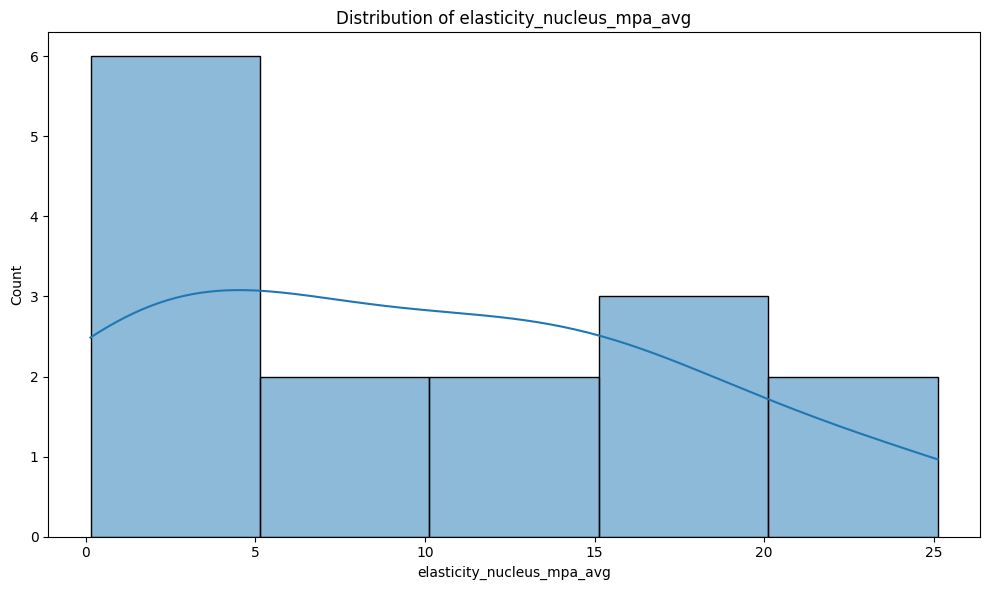

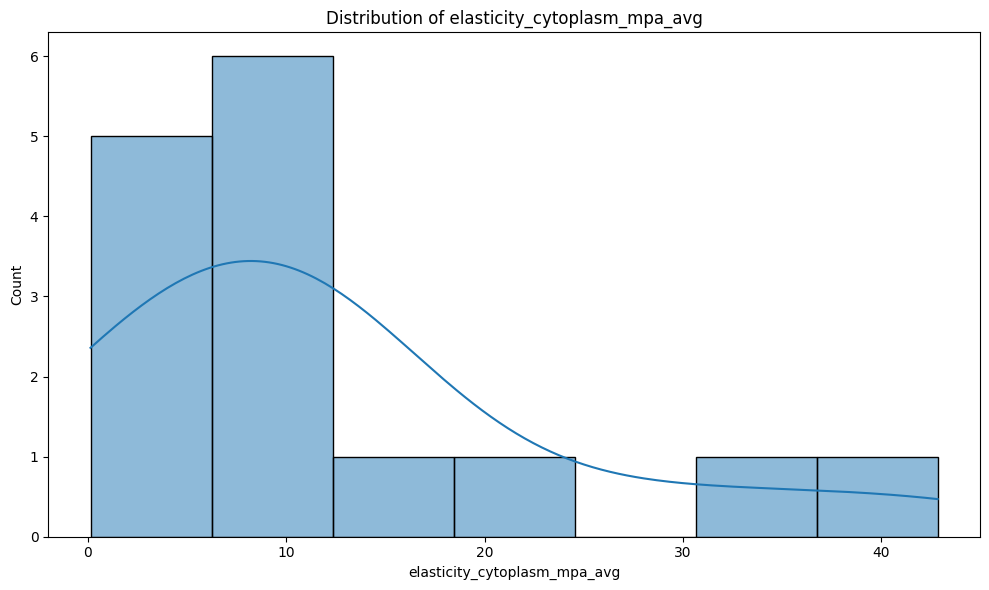

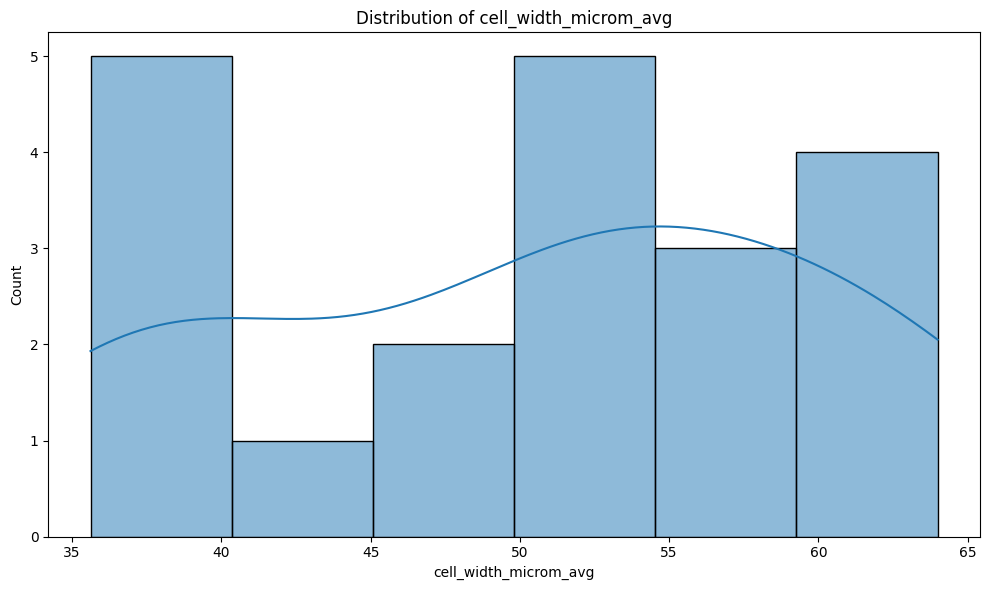

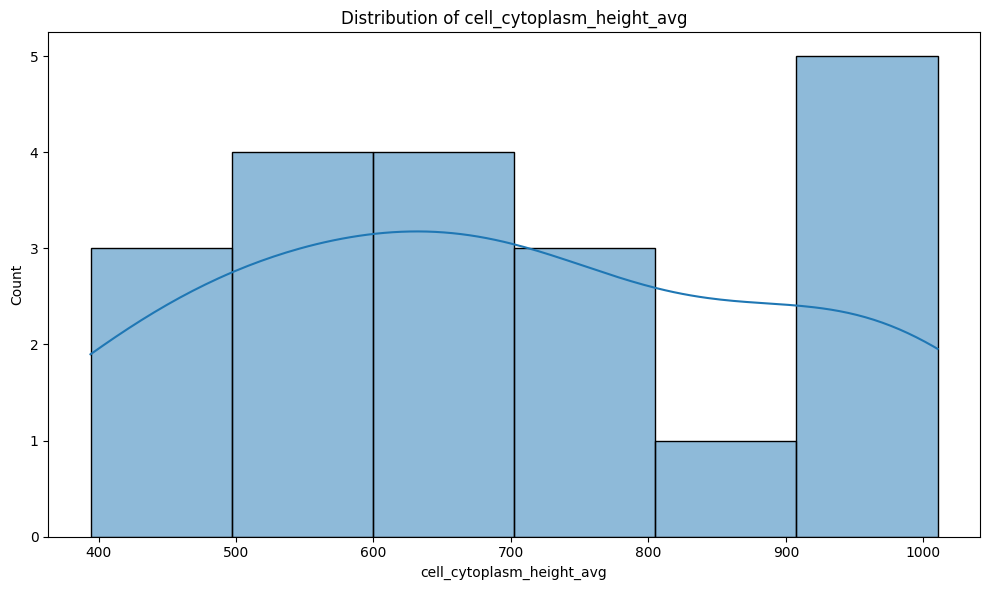

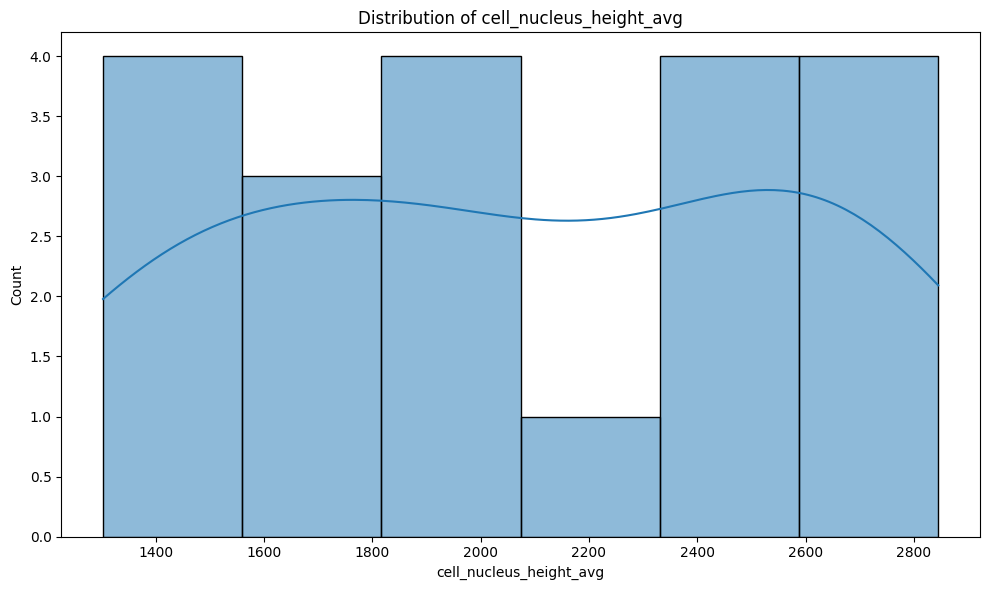

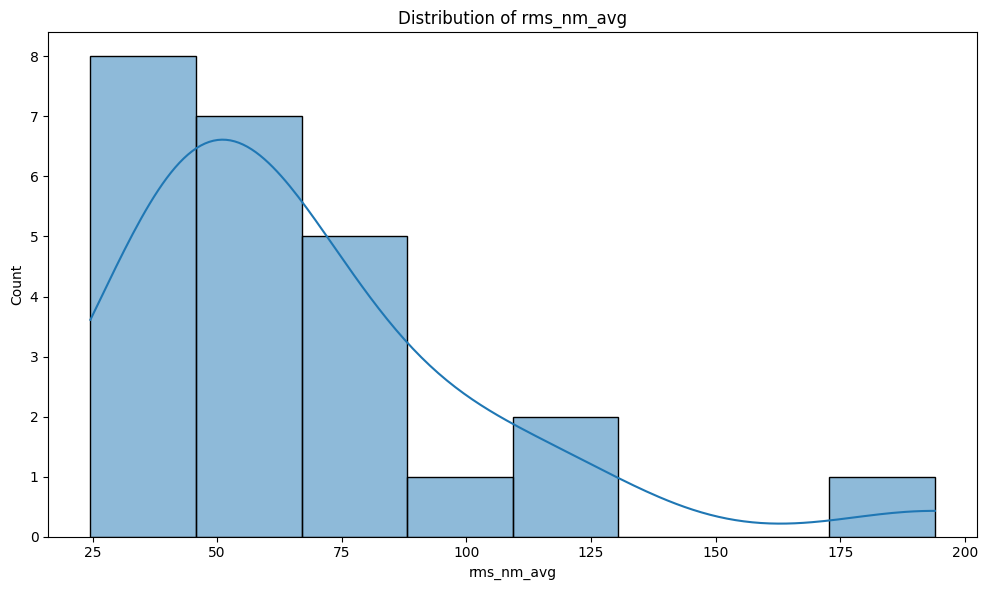

In [10]:
# Visualize distributions of biophysical properties
for prop in biophysical_props:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[prop], kde=True)
    plt.title(f'Distribution of {prop}')
    plt.tight_layout()
    plt.show()

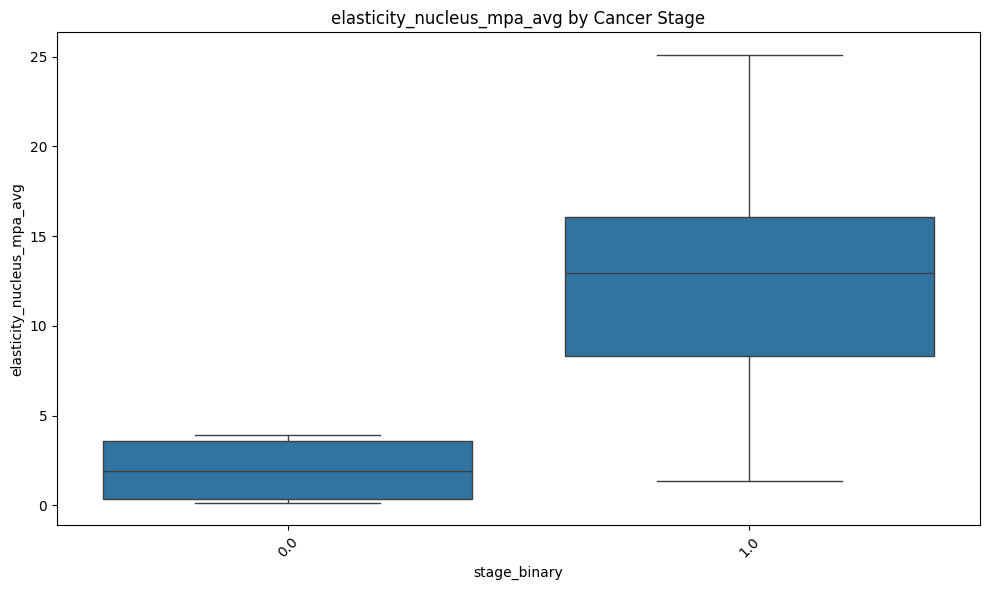

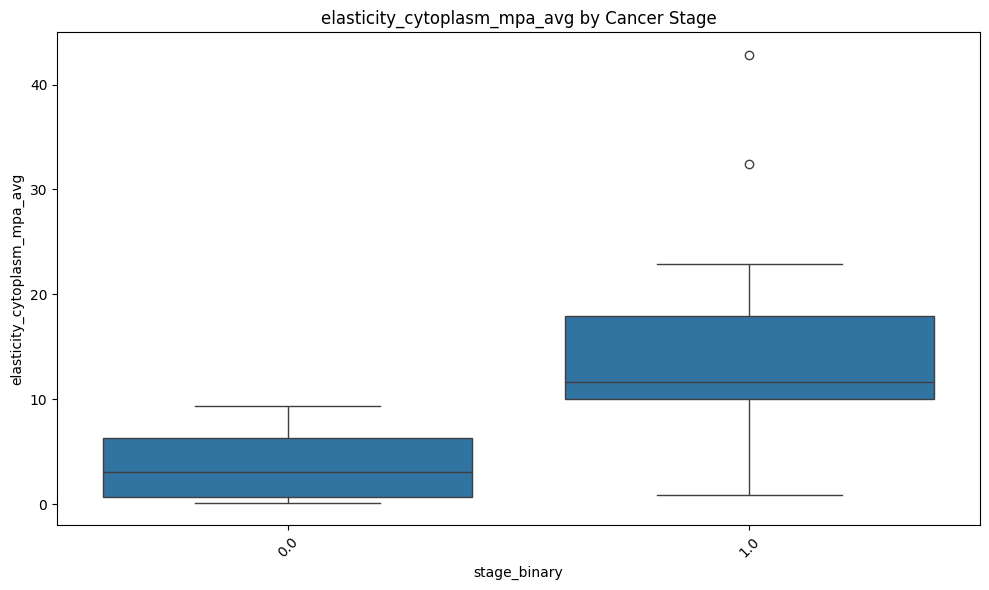

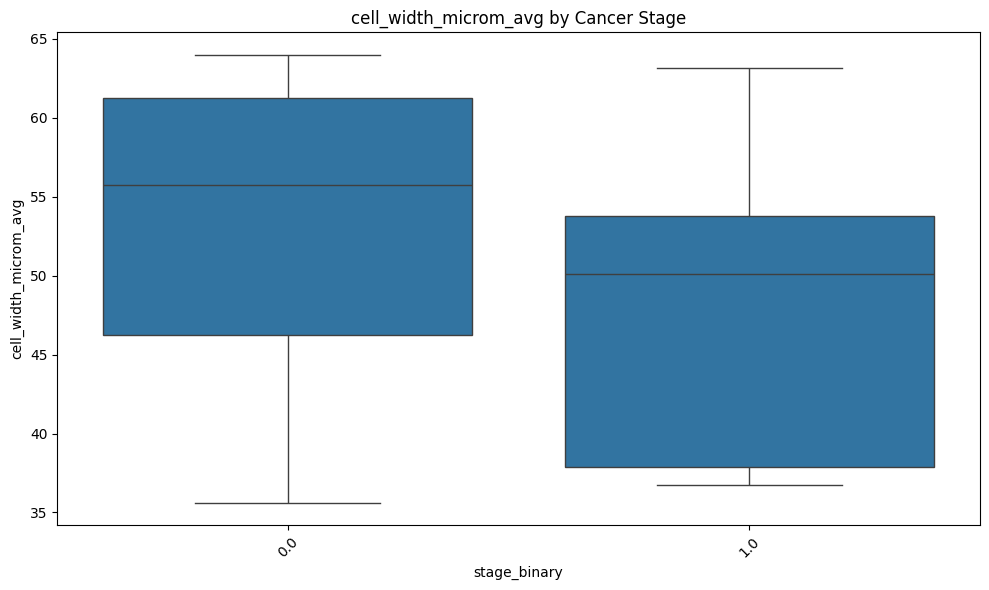

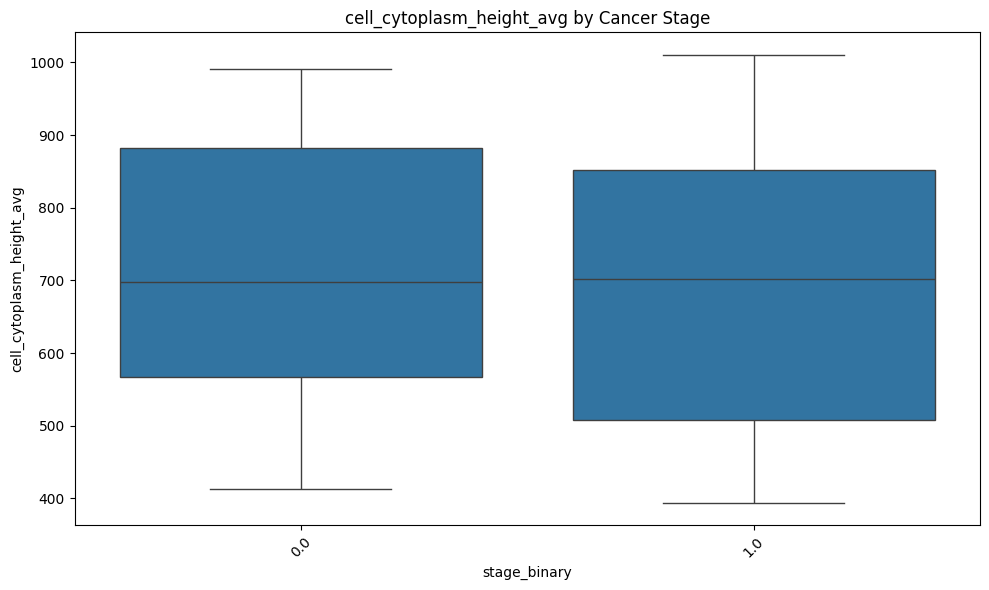

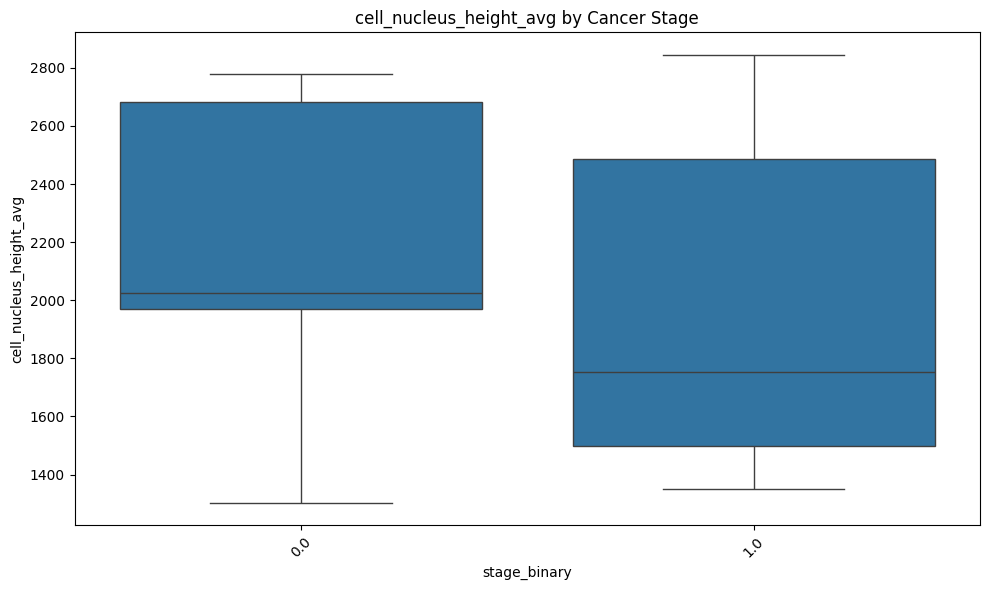

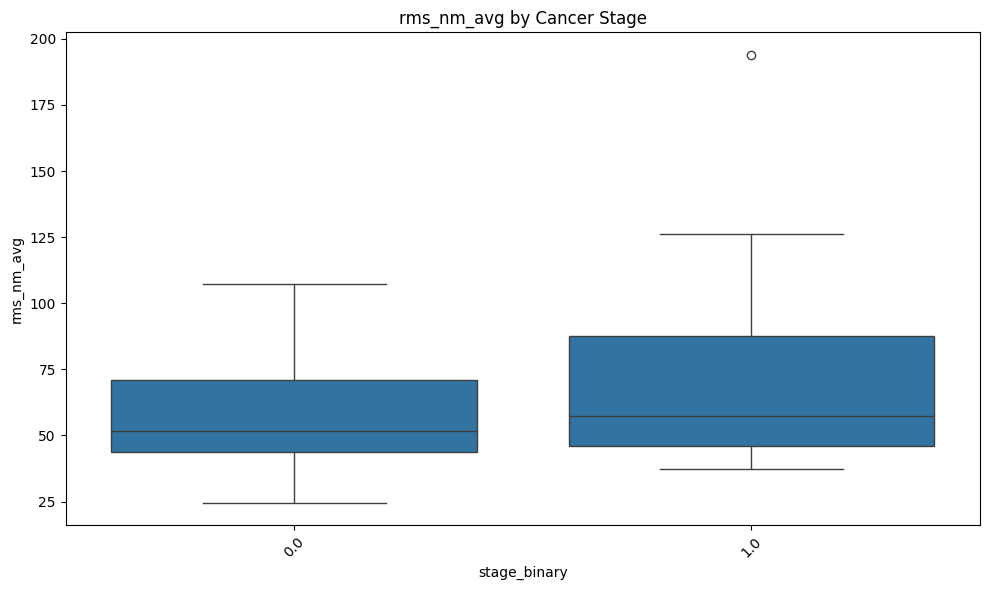

In [44]:
# Compare biophysical properties across cancer stages
for prop in biophysical_props:
    create_boxplot(df, 'stage_binary', prop, f'{prop} by Cancer Stage')

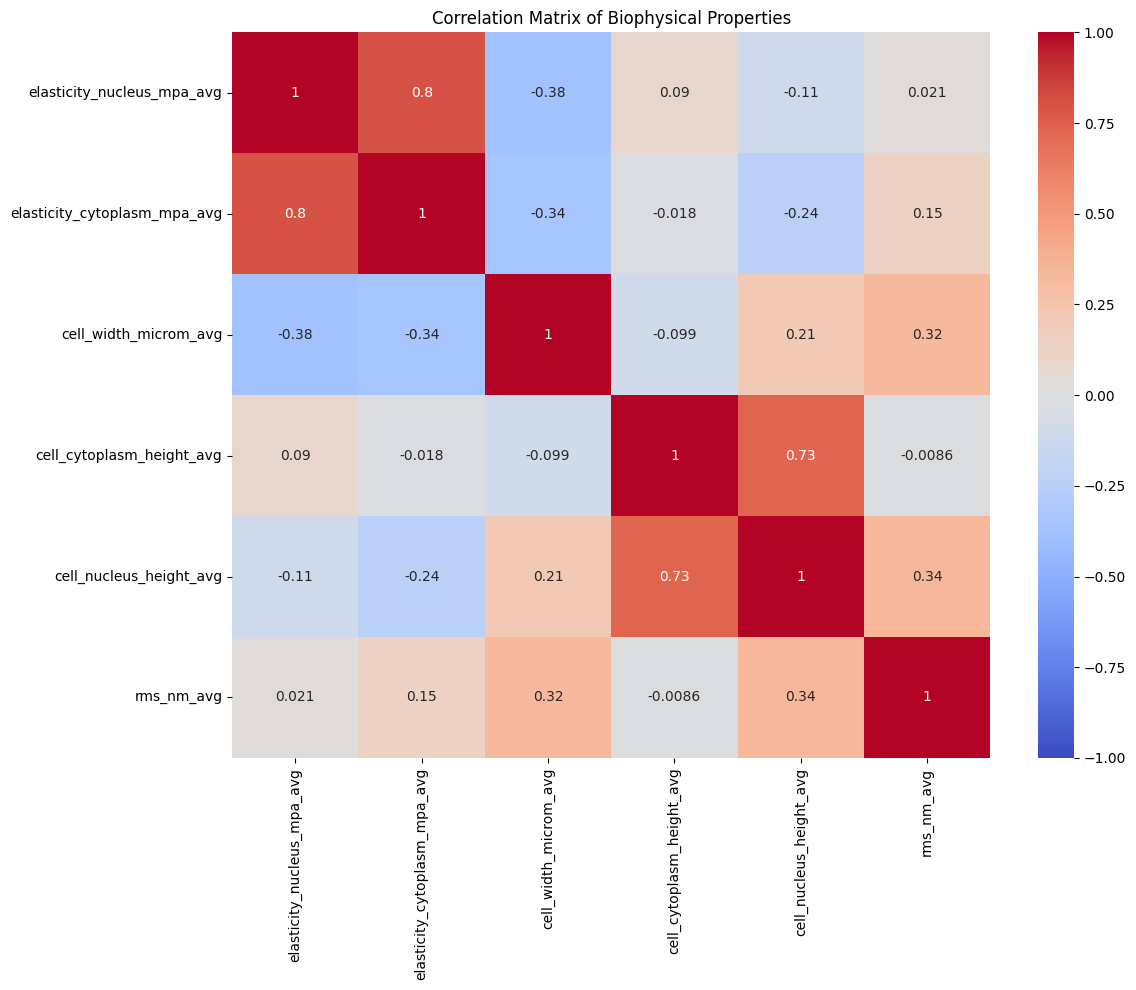


Correlation Matrix:
                              elasticity_nucleus_mpa_avg  \
elasticity_nucleus_mpa_avg                      1.000000   
elasticity_cytoplasm_mpa_avg                    0.800978   
cell_width_microm_avg                          -0.379243   
cell_cytoplasm_height_avg                       0.089634   
cell_nucleus_height_avg                        -0.107037   
rms_nm_avg                                      0.020810   

                              elasticity_cytoplasm_mpa_avg  \
elasticity_nucleus_mpa_avg                        0.800978   
elasticity_cytoplasm_mpa_avg                      1.000000   
cell_width_microm_avg                            -0.344292   
cell_cytoplasm_height_avg                        -0.017868   
cell_nucleus_height_avg                          -0.239115   
rms_nm_avg                                        0.147592   

                              cell_width_microm_avg  \
elasticity_nucleus_mpa_avg                -0.379243   
elasticity_cy

In [31]:
# Correlation matrix of biophysical properties
correlation_matrix = df[biophysical_props].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Biophysical Properties')
plt.tight_layout()
plt.show()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

Analyzing elasticity by cancer type:


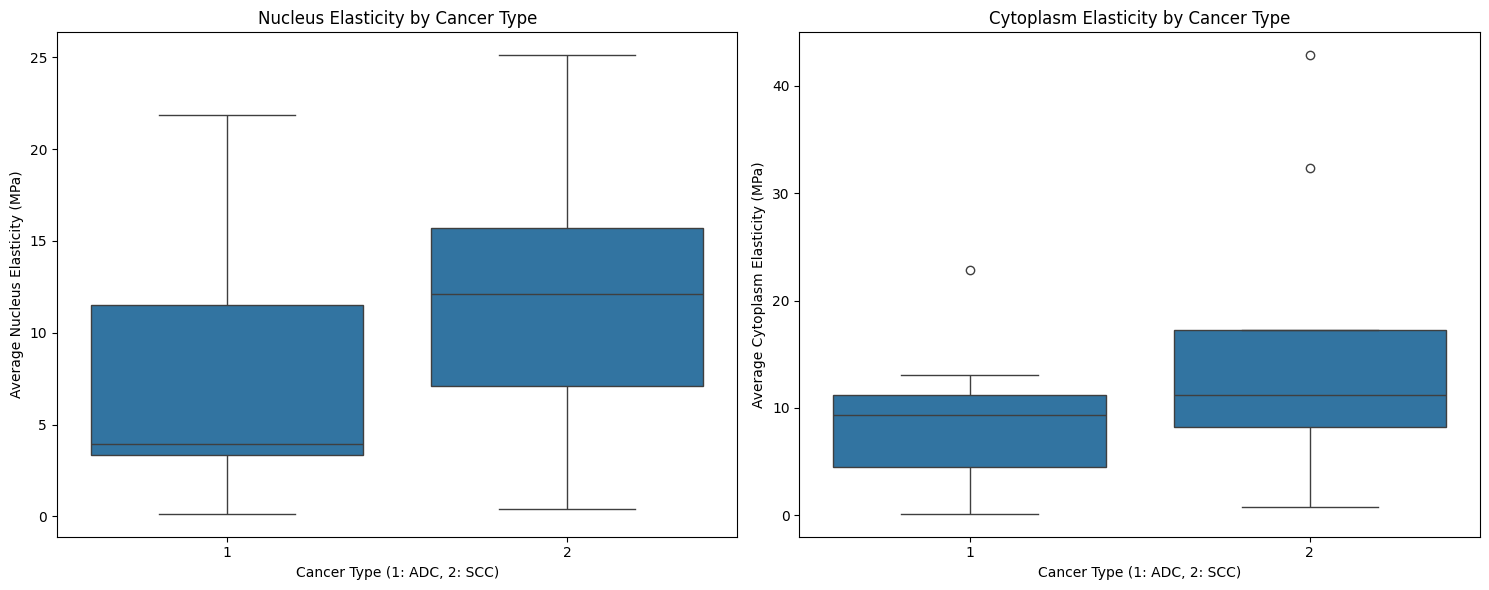

Mann-Whitney U test for nucleus elasticity between cancer types:
Statistic: 20.0, p-value: 0.39689199689199695
Mann-Whitney U test for cytoplasm elasticity between cancer types:
Statistic: 20.0, p-value: 0.39689199689199695


In [22]:
# Do the different cancer types have different elasticity?
def analyze_elasticity_by_cancer_type():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.boxplot(x='subtype', y='elasticity_nucleus_mpa_avg', data=df, ax=ax1)
    ax1.set_title('Nucleus Elasticity by Cancer Type')
    ax1.set_ylabel('Average Nucleus Elasticity (MPa)')
    ax1.set_xlabel('Cancer Type (1: ADC, 2: SCC)')
    
    sns.boxplot(x='subtype', y='elasticity_cytoplasm_mpa_avg', data=df, ax=ax2)
    ax2.set_title('Cytoplasm Elasticity by Cancer Type')
    ax2.set_ylabel('Average Cytoplasm Elasticity (MPa)')
    ax2.set_xlabel('Cancer Type (1: ADC, 2: SCC)')
    
    plt.tight_layout()
    plt.show()

    for elasticity_type in ['nucleus', 'cytoplasm']:
        adc = df[df['subtype'] == 1][f'elasticity_{elasticity_type}_mpa_avg'].dropna()
        scc = df[df['subtype'] == 2][f'elasticity_{elasticity_type}_mpa_avg'].dropna()
        if len(adc) > 0 and len(scc) > 0:
            statistic, p_value = stats.mannwhitneyu(adc, scc, alternative='two-sided')
            print(f"Mann-Whitney U test for {elasticity_type} elasticity between cancer types:")
            print(f"Statistic: {statistic}, p-value: {p_value}")
        else:
            print(f"Not enough data to perform Mann-Whitney U test for {elasticity_type} elasticity between cancer types.")

print("Analyzing elasticity by cancer type:")
analyze_elasticity_by_cancer_type()


2. Analyzing elasticity by metastatic status:


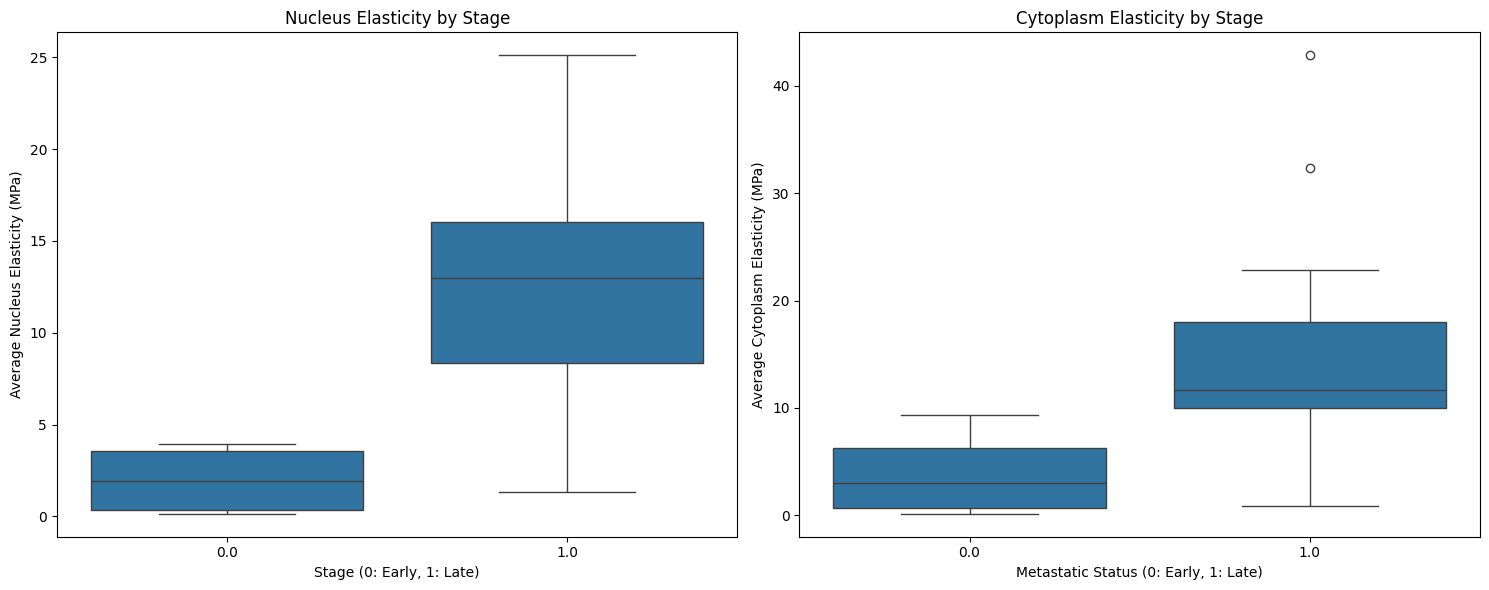

Mann-Whitney U test for nucleus elasticity between metastatic and non-metastatic cancers:
Statistic: 4.0, p-value: 0.017582417582417582
Mann-Whitney U test for cytoplasm elasticity between metastatic and non-metastatic cancers:
Statistic: 5.0, p-value: 0.026373626373626374


In [20]:
# Are more metastatic cancers softer?
def analyze_elasticity_by_metastasis():
    # Assuming stages III and above are considered metastatic
    df['metastatic'] = df['stage_binary']
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.boxplot(x='metastatic', y='elasticity_nucleus_mpa_avg', data=df, ax=ax1)
    ax1.set_title('Nucleus Elasticity by Stage')
    ax1.set_xlabel('Stage (0: Early, 1: Late)')
    ax1.set_ylabel('Average Nucleus Elasticity (MPa)')
    
    sns.boxplot(x='metastatic', y='elasticity_cytoplasm_mpa_avg', data=df, ax=ax2)
    ax2.set_title('Cytoplasm Elasticity by Stage')
    ax2.set_xlabel('Stage (0: Early, 1: Late)')
    ax2.set_ylabel('Average Cytoplasm Elasticity (MPa)')
    
    plt.tight_layout()
    plt.show()

    for elasticity_type in ['nucleus', 'cytoplasm']:
        non_metastatic = df[df['metastatic'] == 0][f'elasticity_{elasticity_type}_mpa_avg'].dropna()
        metastatic = df[df['metastatic'] == 1][f'elasticity_{elasticity_type}_mpa_avg'].dropna()
        if len(non_metastatic) > 0 and len(metastatic) > 0:
            statistic, p_value = stats.mannwhitneyu(non_metastatic, metastatic, alternative='two-sided')
            print(f"Mann-Whitney U test for {elasticity_type} elasticity between metastatic and non-metastatic cancers:")
            print(f"Statistic: {statistic}, p-value: {p_value}")
        else:
            print(f"Not enough data to perform Mann-Whitney U test for {elasticity_type} elasticity by metastatic status.")

print("Analyzing elasticity by metastatic status:")
analyze_elasticity_by_metastasis()

Analyzing cell shape by invasiveness:


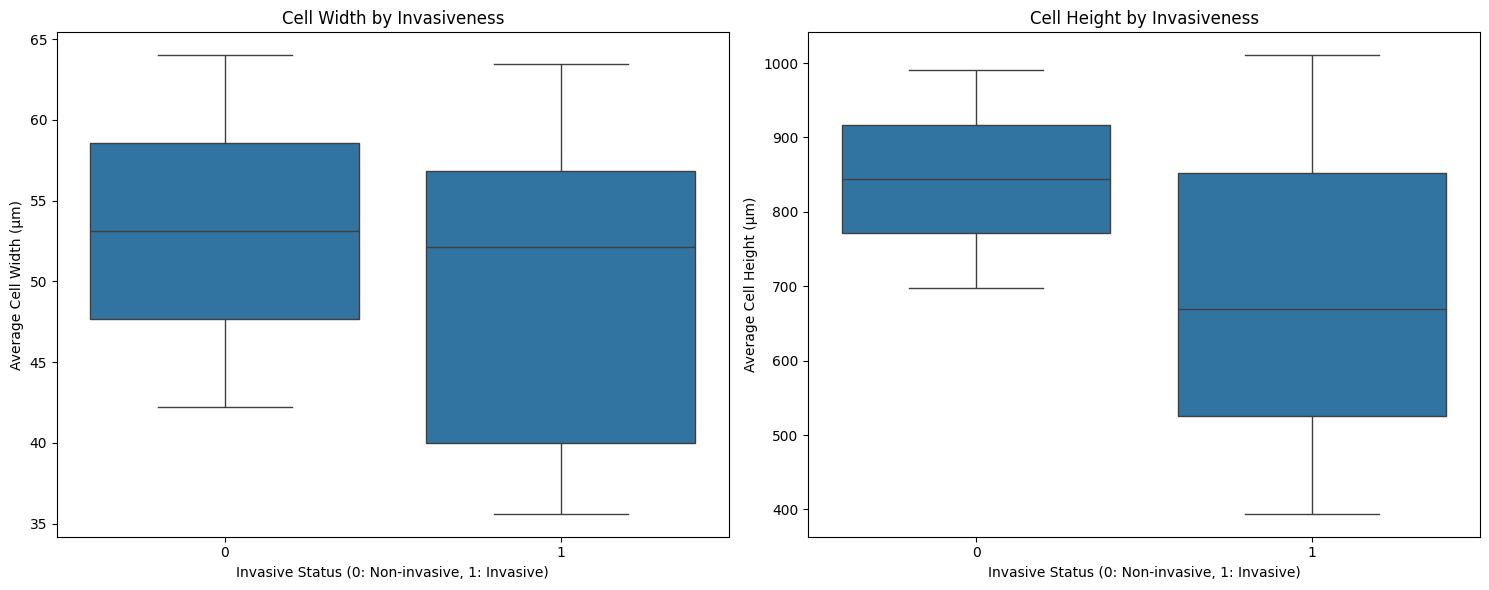

Mann-Whitney U test for cell width_microm between invasive and non-invasive cancers:
Statistic: 23.0, p-value: 0.5894736842105263
Mann-Whitney U test for cell cytoplasm_height between invasive and non-invasive cancers:
Statistic: 26.0, p-value: 0.3789473684210526


In [23]:
# Are more invasive cancer cells larger?
def analyze_cell_shape_by_invasiveness():
    # Assuming LVI, VI, or PNI indicate invasiveness
    df['invasive'] = ((df['lvi'] == 1) | (df['vi'] == 1) | (df['pni'] == 1)).astype(int)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.boxplot(x='invasive', y='cell_width_microm_avg', data=df, ax=ax1)
    ax1.set_title('Cell Width by Invasiveness')
    ax1.set_xlabel('Invasive Status (0: Non-invasive, 1: Invasive)')
    ax1.set_ylabel('Average Cell Width (µm)')
    
    sns.boxplot(x='invasive', y='cell_cytoplasm_height_avg', data=df, ax=ax2)
    ax2.set_title('Cell Height by Invasiveness')
    ax2.set_xlabel('Invasive Status (0: Non-invasive, 1: Invasive)')
    ax2.set_ylabel('Average Cell Height (µm)')
    
    plt.tight_layout()
    plt.show()

    for dimension in ['width_microm', 'cytoplasm_height']:
        non_invasive = df[df['invasive'] == 0][f'cell_{dimension}_avg'].dropna()
        invasive = df[df['invasive'] == 1][f'cell_{dimension}_avg'].dropna()
        if len(non_invasive) > 0 and len(invasive) > 0:
            statistic, p_value = stats.mannwhitneyu(non_invasive, invasive, alternative='two-sided')
            print(f"Mann-Whitney U test for cell {dimension} between invasive and non-invasive cancers:")
            print(f"Statistic: {statistic}, p-value: {p_value}")
        else:
            print(f"Not enough data to perform Mann-Whitney U test for cell {dimension} by invasiveness.")

print("Analyzing cell shape by invasiveness:")
analyze_cell_shape_by_invasiveness()

In [25]:
# Function to calculate mean, SD, and perform Mann-Whitney U test
def analyze_by_group(data, group_col, value_cols):
    results = []
    for col in value_cols:
        group1 = data[data[group_col] == data[group_col].unique()[0]][col].dropna()
        group2 = data[data[group_col] == data[group_col].unique()[1]][col].dropna()
        
        mean1, std1 = group1.mean(), group1.std()
        mean2, std2 = group2.mean(), group2.std()
        
        statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
        
        results.append({
            'Feature': col,
            f'{group_col}_1_Mean': mean1,
            f'{group_col}_1_SD': std1,
            f'{group_col}_2_Mean': mean2,
            f'{group_col}_2_SD': std2,
            'U_statistic': statistic,
            'p_value': p_value
        })
    
    return pd.DataFrame(results)

In [26]:
# 1. Analysis by cancer subtype
subtype_analysis = analyze_by_group(df, 'subtype', biophysical_props)
print("Analysis by Cancer Subtype:")
print(subtype_analysis)

Analysis by Cancer Subtype:
                        Feature  subtype_1_Mean  subtype_1_SD  subtype_2_Mean  \
0    elasticity_nucleus_mpa_avg       11.519988      8.123971        7.961571   
1  elasticity_cytoplasm_mpa_avg       15.292852     14.792165        9.108918   
2         cell_width_microm_avg       51.371600      8.853188       49.439593   
3     cell_cytoplasm_height_avg      667.227750    187.240251      728.569070   
4       cell_nucleus_height_avg     2130.390000    570.832146     2026.978333   
5                    rms_nm_avg       68.612832     53.090312       66.590844   

   subtype_2_SD  U_statistic   p_value  
0      7.838472         36.0  0.396892  
1      7.412353         36.0  0.396892  
2     10.867779         54.0  0.791337  
3    229.630365         41.0  0.520523  
4    499.111724         57.0  0.623176  
5     22.105464         47.0  0.187683  


In [27]:
# 2. Analysis by cancer stage
stage_analysis = analyze_by_group(df, 'stage_binary', biophysical_props)
print("\nAnalysis by Cancer Stage:")
print(stage_analysis)


Analysis by Cancer Stage:
                        Feature  stage_binary_1_Mean  stage_binary_1_SD  \
0    elasticity_nucleus_mpa_avg             1.982367           1.988238   
1  elasticity_cytoplasm_mpa_avg             3.890618           4.298797   
2         cell_width_microm_avg            53.257536          10.044606   
3     cell_cytoplasm_height_avg           714.636461         201.111973   
4       cell_nucleus_height_avg          2207.535432         498.193959   
5                    rms_nm_avg            57.226435          22.359690   

   stage_binary_2_Mean  stage_binary_2_SD  U_statistic   p_value  
0            12.723766           7.263708          4.0  0.017582  
1            15.503888          12.462061          5.0  0.026374  
2            48.072191           9.202194         65.0  0.254451  
3           684.203641         219.262913         54.0  0.761208  
4          1973.260404         545.056791         64.0  0.287495  
5            76.069950          45.302979    

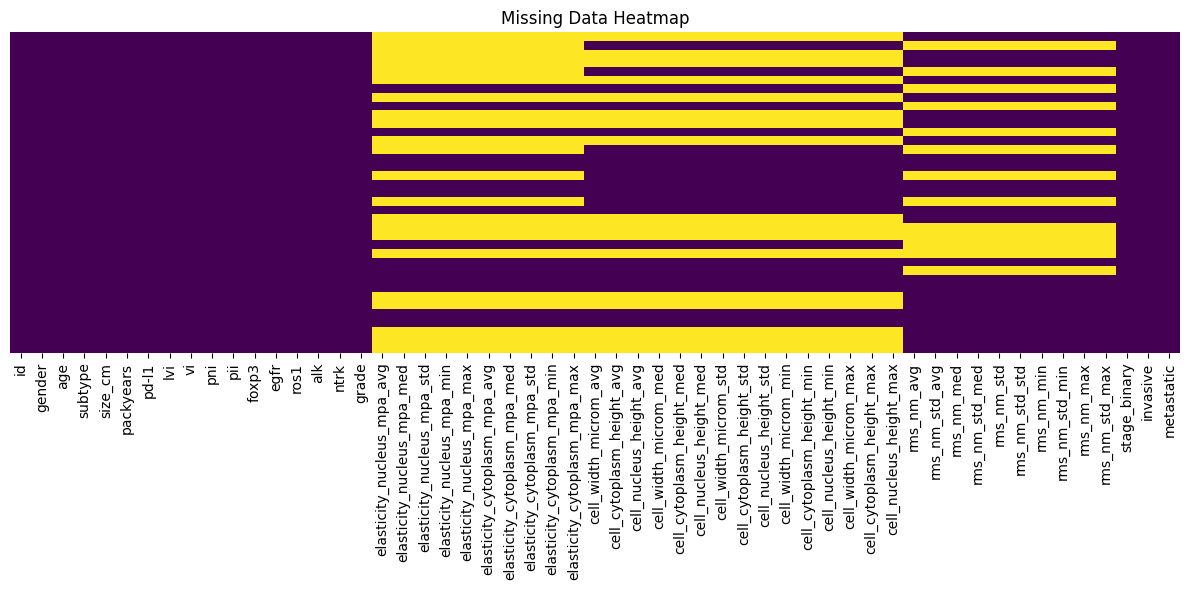

In [81]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()

In [42]:

def evaluate_missingness(df):
    # Little's MCAR test
    def little_mcar_test(data):
        k = len(data.columns)
        n = len(data)
        means = data.mean()
        covar = data.cov()
        d2 = np.zeros(n)
        
        for i in range(n):
            xi = data.iloc[i].values
            mi = ~np.isnan(xi)
            mu = means[mi]
            sigma = covar.loc[mi, mi]
            xi = xi[mi]
            d2[i] = np.dot(np.dot((xi - mu).T, np.linalg.inv(sigma)), (xi - mu))
        
        d2_sum = np.sum(d2)
        df = k * (k + 1) / 2 - 1
        p_value = 1 - stats.chi2.cdf(d2_sum, df)
        return p_value

    p_value_mcar = little_mcar_test(df)
    print(f"Little's MCAR test p-value: {p_value_mcar} (if p-value > 0.05, data might be MCAR)")

    # T-tests for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            missing = df[df[col].isnull()]
            not_missing = df[df[col].notnull()]
            for other_col in numeric_cols:
                if col != other_col:
                    t_stat, p_val = stats.ttest_ind(
                        missing[other_col].dropna(),
                        not_missing[other_col].dropna(),
                        equal_var=False
                    )
                    if p_val < 0.05:
                        print(f"Significant difference in {other_col} when {col} is missing (p={p_val:.4f})")

    # Chi-square tests for categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        if df[col].isnull().sum() > 0:
            for other_col in cat_cols:
                if col != other_col:
                    contingency_table = pd.crosstab(df[col].isnull(), df[other_col])
                    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
                    if p_val < 0.05:
                        print(f"Significant association between missingness in {col} and {other_col} (p={p_val:.4f})")

import re
df_avg = df.copy()

# Define a function to check if a column name contains 'avg' or 'mean'
def is_average(column_name):
    return bool(re.search(r'(_avg|mean)', column_name.lower()))

# Get a list of columns to drop
columns_to_drop = [col for col in df_avg.columns if re.search(r'(elasticity|cell|rms)', col.lower()) and not is_average(col)]
columns_to_drop.append('invasive')
columns_to_drop.append('metastatic')
columns_to_drop.append('rms_nm_std_avg')
columns_to_drop.append('id')

df_avg = df_avg.drop(columns=columns_to_drop)

evaluate_missingness(df_avg)

Little's MCAR test p-value: 0.0 (if p-value > 0.05, data might be MCAR)
Significant difference in lvi when elasticity_nucleus_mpa_avg is missing (p=0.0215)
Significant difference in vi when elasticity_nucleus_mpa_avg is missing (p=0.0026)
Significant difference in stage_binary when elasticity_nucleus_mpa_avg is missing (p=0.0122)
Significant difference in lvi when elasticity_cytoplasm_mpa_avg is missing (p=0.0215)
Significant difference in vi when elasticity_cytoplasm_mpa_avg is missing (p=0.0026)
Significant difference in stage_binary when elasticity_cytoplasm_mpa_avg is missing (p=0.0122)
Significant difference in ntrk when rms_nm_avg is missing (p=0.0428)
Significant difference in cell_width_microm_avg when rms_nm_avg is missing (p=0.0421)


/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipykernel_99498/387363676.py:34: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = stats.ttest_ind(
